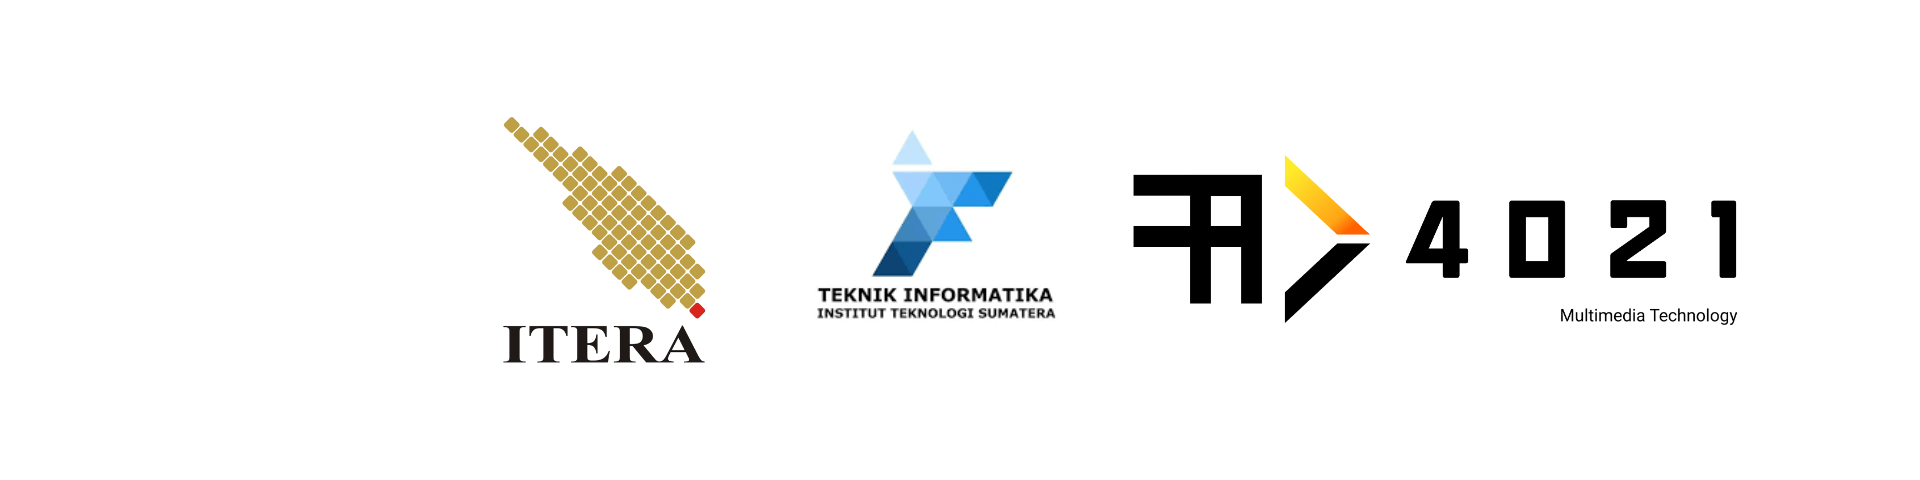

## **Hands On (HO) - 03**

### **Subject - Class**
_Multimedia Technology - R_

### **Topic Hands On - 03**
_Video Processing_

### **Personal Identity**
| **Student Name**  | Kevin Simorangkir      |
|-------------------|----------------------- |
| **ID Student**  | 121140150                |
| **Major**     | Informatics Enginnering    |

### **Language Version**
_English_
___


Mempersiapkan `library` yang akan digunakan dalam `Hands On (HO) - 03` ini. `Library` yang akan digunakan adalah `OS`, `glob`, `cv2`, `numpy`, `matplotlib`, `dlib`, dan `datetime`.

In [1]:
import os #library OS untuk mengakses fungsi-fungsi yang terdapat dalam sistem operasi
import re #library re untuk melakukan pencocokan pola string
from glob import glob #library glob untuk mencari semua pathnames yang cocok dengan pola tertentu
import pandas as pd #library pandas untuk mengolah data tabular
import cv2 #library OpenCV untuk mengolah gambar dan video
import numpy as np #library numpy untuk melakukan operasi vektor dan matriks
import matplotlib.pyplot as plt #library matplotlib untuk membuat plot grafik
import dlib #library dlib untuk mendeteksi wajah
import datetime as dt #library datetime untuk mengolah data tanggal dan waktu

Mengikuti tahap _Pre-requisite_, yaitu:
1. Rekamlah sebuah video yang berdurasi kira-kira 60 detik dengan kamera ponsel. Toleransi durasi adalah 63 detik.
2. Resolusi video haruslah tepat 1920x1080 dengan FPS 30.
3. Gunakan tripod / phone holder agar video tetap stabil
4. Pastikan merekam dalam kondisi pencahayaan yang cukup (cahaya alami matahari lebih disarankan)
5. Anda harus duduk dengan tegak dan bersandar di kursi dan berada di tengah frame. Letakkan kedua tangan di atas lutut anda.
6. Selama perekaman, mintalah teman / keluarga anda untuk menghitung berapa kali anda bernafas selama 60 detik. Bukan hanya sekedar menghitung, teman / keluarga anda harus mencatat pada detik keberapa anda mulai menghembuskan nafas. Oleh karena itu, pastikan teman / keluarga anda menggunakan stopwatch pada HP mereka. (Tekan `LAP` setiap kali anda mulai menghembuskan nafas).
7. Pindahkan catatan tersebut ke dalam `csv` dengan format sebagai berikut:

| Nafas-ke | Second | Milisecond |
|----------|--------|-----------|
| 1        | 0      | 0         |
| 2        | 10     | 0         |

8. Di detik ke 30, gerakkan kepala anda (menghadap ke kanan dan kiri) hanya satu kali saja

## Menampilkan Data
Menampilkan data hembusan dari file csv yang ada di folder File etc. Data yang akan ditampilkan adalah data hembusan nafas yang telah dicatat oleh teman/keluarga. Data tersebut akan ditampilkan dalam bentuk grafik.

In [14]:
from IPython.display import display

# Load the CSV file
csv_path = os.path.join(os.getcwd(), 'File etc' , 'Data Hembusan.csv')
if os.path.exists(csv_path):
    data_hembusan = pd.read_csv(csv_path)

    # Split the single column into multiple columns
    data_hembusan[['Nafas Ke-', 'Second', 'Milisecond']] = data_hembusan['Nafas Ke-;Second;Milisecond'].str.split(';', expand=True)
    data_hembusan.drop(columns=['Nafas Ke-;Second;Milisecond'], inplace=True)

    # Convert columns to numeric
    data_hembusan['Nafas Ke-'] = pd.to_numeric(data_hembusan['Nafas Ke-'])
    data_hembusan['Second'] = pd.to_numeric(data_hembusan['Second'])
    data_hembusan['Milisecond'] = pd.to_numeric(data_hembusan['Milisecond'])

    # Display the dataframe
    display(data_hembusan)
else:
    print(f"File not found: {csv_path}")

,Nafas Ke-,Second,Milisecond
0,1,3,3
1,2,6,39
2,3,9,36
3,4,12,28
4,5,15,25
5,6,17,81
6,7,20,62
7,8,23,36
8,9,26,2
9,10,30,25


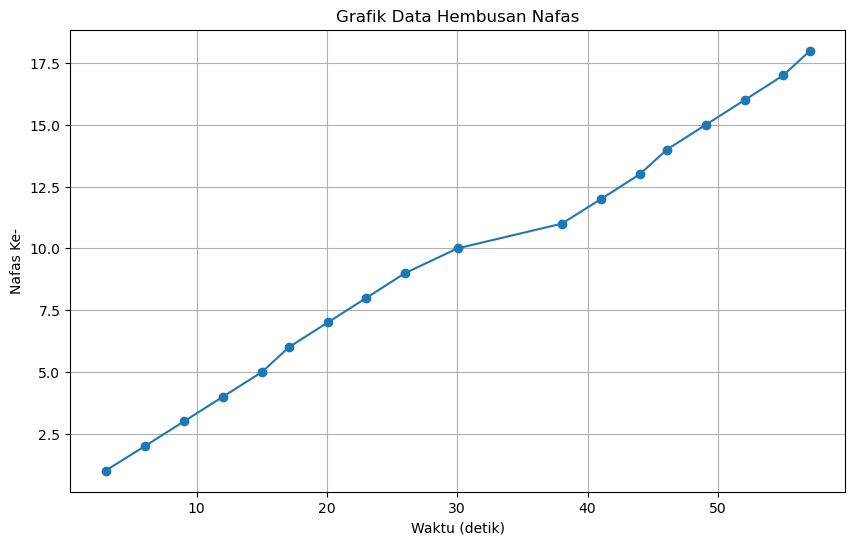

In [15]:
# Plotting the data from Data Hembusan.csv
plt.figure(figsize=(10, 6))
plt.plot(data_hembusan['Second'] + data_hembusan['Milisecond'] /
         1000, data_hembusan['Nafas Ke-'], marker='o')
plt.title('Grafik Data Hembusan Nafas')
plt.xlabel('Waktu (detik)')
plt.ylabel('Nafas Ke-')
plt.grid(True)
plt.show()

### **Membuat Video Dari Gambar**
Mencari dan mengidentifikasi letak dari gambar yang akan dijadikan sebuah video. File akan diambil dari direktori tersebut.

In [4]:
ImagePath = (os.path.join(os.getcwd(), 'Image')) #mengambil path dari folder Image/kevin
ImageList = glob(os.path.join(ImagePath, '*.jpg')) #mengambil semua pathnames yang cocok dengan pola *.jpg

if ImageList:
	print('Lima path pertama dari ImageList:', ImageList[:5]) #menampilkan lima path pertama dari ImageList
else:
	print(f"No images found in directory: {ImagePath}")

Lima path pertama dari ImageList: ['d:\\KEVIN SIMORANGKIR\\Source Code (Program, dll)\\MT\\Image\\frame4.jpg', 'd:\\KEVIN SIMORANGKIR\\Source Code (Program, dll)\\MT\\Image\\kevin-soetta.jpg', 'd:\\KEVIN SIMORANGKIR\\Source Code (Program, dll)\\MT\\Image\\kevin.jpg', 'd:\\KEVIN SIMORANGKIR\\Source Code (Program, dll)\\MT\\Image\\Kevin1.jpg', 'd:\\KEVIN SIMORANGKIR\\Source Code (Program, dll)\\MT\\Image\\KEVINS.JPG']


Melakukan penyortingan terhadap file yang ada di dalam direktori tersebut.

In [5]:
# Example list of image paths (modify with your actual data)
ImageList = [
    "path/to/image1.jpg",
    "path/to/image20.jpg",
    "invalid/path/to/image.jpg",
    "another/path/30.jpg",
]

# Filter and sort
ImageList = [
    x for x in ImageList if re.findall(r'\d+', x.replace('\\', '/').split('/')[-1])
]
ImageList = sorted(
    ImageList,
    key=lambda x: int(re.findall(
        r'\d+', x.replace('\\', '/').split('/')[-1])[0])
)

# Print results
print('Lima path pertama dari ImageList setelah diurutkan:', ImageList[:5])

Lima path pertama dari ImageList setelah diurutkan: ['path/to/image1.jpg', 'path/to/image20.jpg', 'another/path/30.jpg']


---
## **Analisis Pertama**

**Pertanyaan**


Jelaskan maksud dari `list_imgs = sorted(list_imgs, key=lambda x: int(x.split('/')[-1].split('.')[0]))` !

**Jawaban**


Maksud dari `list_imgs = sorted(list_imgs, key=lambda x: int(x.split('/')[-1].split('.')[0]))` adalah untuk melakukan penyortingan terhadap file yang ada di dalam direktori tersebut. Penyortingan dilakukan berdasarkan nama file yang ada di dalam direktori tersebut. Penyortingan dilakukan secara ascending, dimana file yang memiliki nama lebih kecil akan diletakkan di urutan pertama, sedangkan file yang memiliki nama lebih besar akan diletakkan di urutan terakhir.

---

Memuat gambar yang ada di dalam direktori tersebut. Gambar akan dimuat dalam ImageList. Image akan diubah dalam 3 dimensi (RGB) dan akan diubah dalam bentuk array.

In [6]:
image = [] #membuat list image

for ImagePath in ImageList: #mengambil path dari ImageList
    images = cv2.imread(ImagePath) #membaca gambar
    image.append(images) #menambahkan gambar ke list image 

image_array = np.array(image) #mengubah list image menjadi array    

print('Ukuran array:', image_array.shape) #menampilkan ukuran array
print('Tipe data:', image_array.dtype) #menampilkan tipe data

Ukuran array: (3,)
Tipe data: object


Menyimpan gambar yang telah diubah dalam bentuk array ke dalam list.

In [13]:
LocationSave = os.path.join(os.getcwd(), 'Image', 'kevin') #mengambil path dari folder Video/kevin-rgb
fourcc = cv2.VideoWriter_fourcc(*'XVID') #membuat objek video

# Ensure that the image array is not empty and contains valid images
valid_images = [img for img in image_array if img is not None]

if valid_images:
    height, width, layers = valid_images[0].shape #mengambil ukuran gambar
    Video = cv2.VideoWriter(LocationSave, fourcc, 30, (width, height)) #membuat objek video

    for Image in valid_images: #mengambil gambar dari valid_images
        Video.write(Image) #menulis gambar ke objek video
else:
    print("Image dalam directory tidak ditemukan atau tidak valid") #menampilkan pesan jika image dalam directory tidak ditemukan atau tidak valid


Image dalam directory tidak ditemukan atau tidak valid


---
## **Analisis Kedua**

**Pertanyaan**


Jelaskan tentang bagian kode berikut:
    ```python
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    ```
Apakah ada opsi lain selain `mp4v`? Jika ada, coba gunakan dan jelaskan.

**Jawaban**


Bagian kode pada `fourcc = cv2.VideoWriter_fourcc(*'mp4v')` adalah untuk menentukan codec yang akan digunakan dalam pembuatan video. Codec yang digunakan adalah `mp4v`. Ada beberapa opsi lain selain `mp4v`, yaitu: `XVID`, `MJPG`, `DIVX`, `X264`, `WMV1`, `WMV2`, `WMV3`, `WMV4`, `H264`, `H265`, `MPEG`, `MPEG1`, `MPEG2`, `MPEG4`, `VP80`.

---

Menyimpan setiap bingkai video menjadi sebuah gambar. Gambar akan disimpan dalam direktori yang telah ditentukan.

In [ ]:
VideoPath = (os.path.join(os.getcwd(), 'Video', 'kevin-rgb.mp4')) #mengambil path dari folder Video/kevin-rgb
ImageSeqPath = (os.path.join(os.getcwd(), 'Image', 'kevin-seq')) #mengambil path dari folder Image/kevin-seq

if not os.path.exists(ImageSeqPath): #jika folder Image/kevin-seq tidak ada
    os.makedirs(ImageSeqPath) #membuat folder Image/kevin-seq

Capt = cv2.VideoCapture(VideoPath) #membaca video
Frame = 0 #inisialisasi frame

while Frame < 100: #membaca 100 frame
    ret, FrameImg = Capt.read() #membaca frame
    if not ret: #jika frame tidak ada
        break #keluar dari loop
    cv2.imwrite(os.path.join(ImageSeqPath, 'frame'+str(Frame)+'.jpg'), FrameImg) #menyimpan frame
    Frame += 1 #menambah frame

Capt.release() #menutup video
print('Seratus frame pertama telah disimpan di Image/kevin-seq') #menampilkan pesan


Seratus frame pertama telah disimpan di Image/kevin-seq


---
## **Analisis Ketiga**

**Pertanyaan**


Membuat video dengan FPS yang lebih rendah.

1. Dengan menggunakan video, simpanlah frame gambar setiap 3 frame. Begini ilustrasinya, jika ada frame 1 s/d 30, maka anda hanya perlu menyimpan frame 1, 4, 7, 10, 13, 16, 19, 22, 25, 28.
2. Dengan analogi ini, artinya anda mengurangi FPS-nya. Berapakah FPS yang baru?
3. Untuk setiap gambar, convertlah ke dalam format grayscale dan resize menjadi 1280 x 720.
4. Untuk setiap gambar, berikanlah titik merah (ukuran bebas, namun terlihat ketika video diputar). Titik tersebut bergerak dari kiri ke kanan untuk setiap frame. Titik tersebut harus sampai di ujung kanan gambar pada frame terakhir. Anda harus melakukan ini secara manual dengan memanipulasi matriks (tidak boleh pakai fungsi / library yang sudah ada)
5. Ingat, karena ini titik merah, maka channel warna pada video anda haruslah RGB (walaupun gambarnya telah menjadi grayscale).
6. Save video tersebut dengan nama `video_low_fps.mp4`

**Jawaban**

In [ ]:
# Path to save the new video
LowFPSVideoPath = os.path.join(os.getcwd(), 'Video', 'Kevin-LowFPS.mp4')

# Initialize video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(LowFPSVideoPath, fourcc, 10, (1280, 720))

# Reinitialize the video capture
Capt = cv2.VideoCapture(VideoPath)

frame_count = 0
while True:
    ret, frame = Capt.read()
    if not ret:
        break
    if frame_count % 3 == 0:
        # Convert to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Resize to 1280x720
        resized_frame = cv2.resize(gray_frame, (1280, 720))
        # Convert back to RGB
        rgb_frame = cv2.cvtColor(resized_frame, cv2.COLOR_GRAY2RGB)
        # Add red dot
        dot_position = int((frame_count // 3) * (1280 / (frame_count // 3 + 1)))
        rgb_frame[360:365, dot_position:dot_position+5] = [255, 0, 0]
        # Write the frame to the video
        out.write(rgb_frame)
    frame_count += 1

# Release everything
Capt.release()
out.release()

print('Video dengan frame rate rendah telah disimpan di Video/Kevin-LowFPS.mp4') #menampilkan pesan

Video dengan frame rate rendah telah disimpan di Video/Kevin-LowFPS.mp4


---

Memindahkan data sebuah video ke dalam sebuah array. Array tersebut akan diubah menjadi sebuah video. Dalam hal ini menggunakan `cv2.VideoCapture` untuk membaca video yang telah dibuat sebelumnya.

In [ ]:
VideoPath = (os.path.join(os.getcwd(), 'Video', 'kevin-rgb.mp4')) #mengambil path dari folder Video/kevin-rgb
Capt = cv2.VideoCapture(VideoPath) #membaca video
Frame = [] #membuat list Frame

while True: #loop
    ret, FrameImg = Capt.read() #membaca frame
    if not ret: #jika frame tidak ada
        break #keluar dari loop
    # Reduce the resolution of the frame
    FrameImg = cv2.resize(FrameImg, (640, 360))
    Frame.append(FrameImg) #menambah frame ke list Frame

FrameArray = np.array(Frame) #mengubah list Frame menjadi array
Capt.release() #menutup video

print('Ukuran array:', FrameArray.shape) #menampilkan ukuran array

Ukuran array: (1838, 360, 640, 3)


Mengambil satu gambar dari video yang telah dibuat sebelumnya. Gambar akan diubah dalam bentuk grayscale dan akan diubah dalam bentuk array.

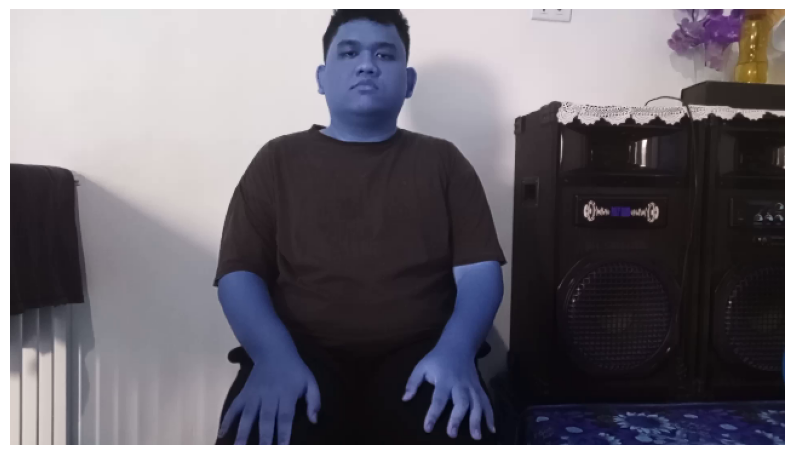

In [ ]:
SingleImage = FrameArray[0].copy() #mengambil frame pertama 

plt.figure(figsize=(10, 10)) #membuat figure
plt.imshow(SingleImage) #menampilkan gambar
plt.axis('off') #menghilangkan axis
plt.show() #menampilkan gambar

Mengubah warna pada gambar dari BGR menjadi RGB.
BGR adalah format warna yang digunakan oleh OpenCV, sedangkan RGB adalah format warna yang digunakan oleh matplotlib.

In [ ]:
FrameArrayRGB = np.array([cv2.cvtColor(Frame, cv2.COLOR_BGR2RGB) for Frame in FrameArray]) #mengubah warna frame menjadi RGB
print('Frame Array RGB:', FrameArrayRGB.shape) #menampilkan lima frame pertama

Frame Array RGB: (1838, 360, 640, 3)


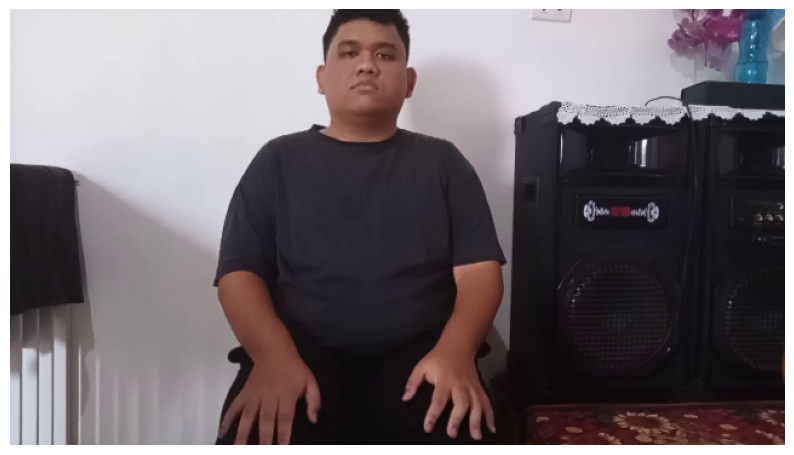

In [ ]:
SingleImage = FrameArrayRGB[0].copy() #mengambil frame pertama

plt.figure(figsize=(10, 10)) #membuat figure
plt.imshow(SingleImage) #menampilkan gambar
plt.axis('off') #menghilangkan axis
plt.show() #menampilkan gambar

Mendeteksi muka pada gambar yang telah diubah dalam bentuk array. Dalam hal ini menggunakan `dlib.get_frontal_face_detector()` untuk mendeteksi muka pada gambar yang telah diubah dalam bentuk array.

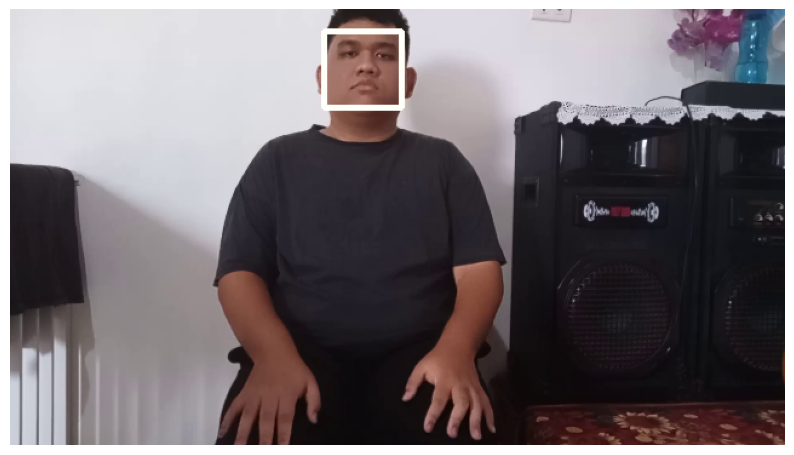

In [ ]:
detector = dlib.get_frontal_face_detector() #mendeteksi wajah

Faces = detector(SingleImage, 1) #mendeteksi wajah pada gambar
for i, face in enumerate(Faces): #loop
    x, y, w, h = face.left(), face.top(), face.width(), face.height() #mengambil koordinat wajah
    x2, y2 = x + w, y + h #mengambil koordinat wajah
    cv2.rectangle(SingleImage, (x, y), (x2, y2), (255, 255, 250), 3) #menggambar kotak pada wajah

plt.figure(figsize=(10, 10)) #membuat figure
plt.imshow(SingleImage) #menampilkan gambar
plt.axis('off') #menghilangkan axis
plt.show() #menampilkan gambar

Mendeteksi berapa ukuran dari muka yang terdeteksi pada gambar yang telah diubah dalam bentuk array. Ukuran berupa koordinat x, y, lebar, dan tinggi.

Koordinat wajah ke 0 : 259 18 64 63
Koordinat wajah ke 0 setelah diubah: 259 11 64 69


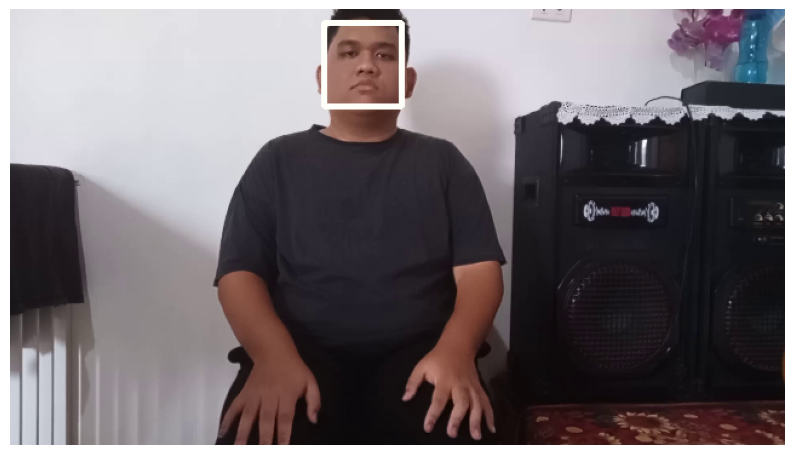

In [ ]:
SingleImage = FrameArrayRGB[0].copy() #mengambil frame pertama
Faces = detector(SingleImage, 1) #mendeteksi wajah pada gambar
for i, face in enumerate(Faces): #loop
    x, y, w, h = face.left(), face.top(), face.width(), face.height() #mengambil koordinat wajah
    print('Koordinat wajah ke', i, ':', x, y, w, h) #menampilkan koordinat wajah
    
    y_edit = int(y - (0.10 * h)) #mengubah koordinat y
    h_edit = int(h + (0.10 * h)) #mengubah koordinat h
    print('Koordinat wajah ke', i, 'setelah diubah:', x, y_edit, w, h_edit) #menampilkan koordinat wajah setelah diubah
    
    cv2.rectangle(SingleImage, (x, y_edit), (x + w, y_edit + h_edit), (255, 255, 250), 3) #menggambar kotak pada wajah

plt.figure(figsize=(10, 10)) #membuat figure
plt.imshow(SingleImage) #menampilkan gambar
plt.axis('off') #menghilangkan axis
plt.show() #menampilkan gambar

---
## **Analisis Keempat**

**Pertanyaan**


Berdasarkan ROI wajah, sesuaikanlah ROI tersebut untuk menyeleksi area bahu hingga dada.

**Jawaban**

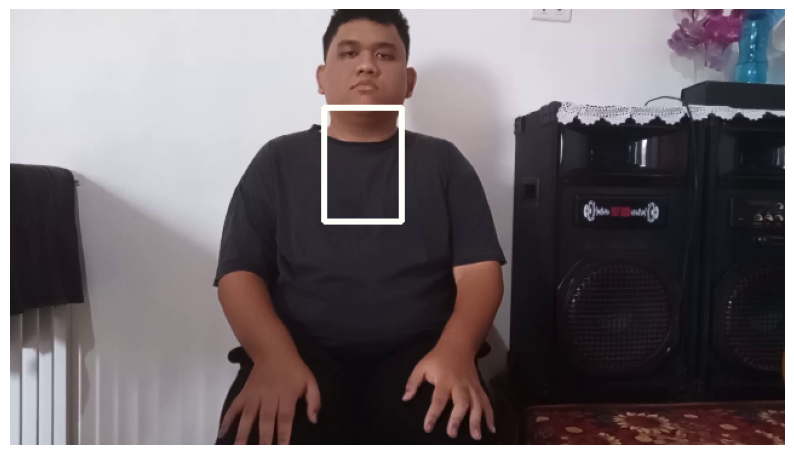

In [ ]:
# Mengambil frame pertama
SingleImage = FrameArrayRGB[0].copy()

# Mendeteksi wajah pada gambar
Faces = detector(SingleImage, 1)

# Menyesuaikan ROI untuk menyeleksi area bahu hingga dada
for i, face in enumerate(Faces):
    x, y, w, h = face.left(), face.top(), face.width(), face.height()
    x2, y2 = x + w, y + h
    
    # Menyesuaikan ROI untuk area bahu hingga dada
    y_bahu = y2
    h_bahu = int(h * 1.5)  # Menambah tinggi ROI untuk mencakup bahu hingga dada
    y_bahu2 = y_bahu + h_bahu
    
    # Menggambar kotak pada area bahu hingga dada
    cv2.rectangle(SingleImage, (x, y_bahu), (x2, y_bahu2), (255, 255, 250), 3)

plt.figure(figsize=(10, 10))
plt.imshow(SingleImage)
plt.axis('off')
plt.show()

Mendeteksi wajah didalam sebuah video yang telah dibuat sebelumnya. Dalam hal ini menggunakan `dlib.get_frontal_face_detector()` untuk mendeteksi wajah pada video yang telah dibuat sebelumnya.

In [ ]:

VideoPath = (os.path.join(os.getcwd(), 'Video', 'kevin-rgb.mp4')) #mengambil path dari folder Video/kevin-rgb
OutputPath = (os.path.join(os.getcwd(), 'Video', 'kevin-faces.mp4')) #mengambil path dari folder Video/kevin-shoulder
detector = dlib.get_frontal_face_detector() #mendeteksi wajah

Capt = cv2.VideoCapture(VideoPath) #membaca video
FPS = 30 #frame per detik
start_time = dt.datetime.now()  # mencatat waktu mulai

frame_width = int(Capt.get(cv2.CAP_PROP_FRAME_WIDTH)) #mengambil lebar frame
frame_height = int(Capt.get(cv2.CAP_PROP_FRAME_HEIGHT)) #mengambil tinggi frame

fourcc = cv2.VideoWriter_fourcc(*'mp4v') #membuat objek video
out = cv2.VideoWriter(OutputPath, fourcc, FPS, (frame_width, frame_height)) #membuat objek video

total_frames = FPS * 10 #membaca 10 detik video
frame_count = 0 #inisialisasi frame

while frame_count < total_frames: #loop
    ret, frame = Capt.read() #membaca frame
    if not ret: #jika frame tidak ada
        break #keluar dari loop

    Faces = detector(frame, 1) #mendeteksi wajah pada frame
    for i, face in enumerate(Faces):
        x, y, w, h = face.left(), face.top(), face.width(), face.height()
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 250), 3)

    out.write(frame) #menulis frame ke objek video
    frame_count += 1 #menambah frame
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

Capt.release() #menutup video
cv2.destroyAllWindows() #menutup semua jendela
print('Video dengan wajah terdeteksi telah disimpan di Video/kevin-faces.mp4') #menampilkan pesan
print('Waktu yang diperlukan:', dt.datetime.now() - start_time) #menampilkan waktu yang diperlukan

Video dengan wajah terdeteksi telah disimpan di Video/kevin-faces.mp4
Waktu yang diperlukan: 0:06:17.726324


---
## **Analisis Kelima**

**Pertanyaan**


Dengan menggunakan video anda, lakukan facial tracking pada detik ke 25 - 40. Berikan bounding box pada wajah yang terdeteksi. Simpan video tersebut di google drive, link-nya cantumkan pada jawaban anda.
Lakukan strategi terbaik untuk mengatur ROI agar wajah tetap terdeteksi pada setiap frame.
Anda dapat menyesuaikan waktu deteksi (berapa detik sekali deteksi dengan dlib dilakukan)
Anda dapat menyesuaikan parameter deteksi wajah dengan dlib dan parameter tracking dengan OpenCV

**Jawaban**

In [ ]:
import cv2
import dlib
import os
import datetime as dt

# Path to the input video
VideoPath = os.path.join(os.getcwd(), 'Video', 'kevin-rgb.mp4')
# Path to save the output video
OutputPath = os.path.join(os.getcwd(), 'Video', 'kevin-facial-tracking.mp4')

# Initialize dlib's face detector
detector = dlib.get_frontal_face_detector()

# Initialize video capture
Capt = cv2.VideoCapture(VideoPath)
FPS = 30  # Frame per second

# Get frame width and height
frame_width = int(Capt.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(Capt.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Initialize video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(OutputPath, fourcc, FPS, (frame_width, frame_height))

# Calculate the frame range for 25 to 40 seconds
start_frame = 25 * FPS
end_frame = 40 * FPS

# Initialize frame count
frame_count = 0

# Start processing the video
while True:
    ret, frame = Capt.read()
    if not ret:
        break

    # Process only frames within the specified range
    if start_frame <= frame_count < end_frame:
        # Detect faces every 5 frames to reduce computation
        if frame_count % 5 == 0:
            Faces = detector(frame, 1)
        
        # Draw bounding boxes around detected faces
        for face in Faces:
            x, y, w, h = face.left(), face.top(), face.width(), face.height()
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 250), 3)
        
        # Write the frame to the output video
        out.write(frame)
    
    frame_count += 1

# Release resources
Capt.release()
out.release()
cv2.destroyAllWindows()

print('Video dengan facial tracking telah disimpan di Video/kevin-facial-tracking.mp4')

Video dengan facial tracking telah disimpan di Video/kevin-facial-tracking.mp4


---

## **Analisis Keenam**

**Pertanyaan**


- Tempelkan sebuah .png pada wajah anda (bisa di landmark lain, selain mata)
- Modifikasi kode di atas agar lebih smooth Tips: - Lakukan deteksi landmark tidak di setiap frame, melainkan setiap beberapa frame - Misal. Deteksi landmark hanya dilakukan per setiap detik (atau 30 frame sekali)

**Jawaban**

In [ ]:
# Path to the overlay image
OverlayPath = os.path.join(os.getcwd(), 'Image', 'Topeng.png')

# Load the overlay image
overlay_img = cv2.imread(OverlayPath, cv2.IMREAD_UNCHANGED)

# Initialize video capture and writer
Capt = cv2.VideoCapture(VideoPath)
OutputPath = os.path.join(os.getcwd(), 'Video', 'kevin-overlay.mp4')
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(OutputPath, fourcc, FPS, (frame_width, frame_height))

# Function to overlay an image on another image
def overlay_image(background, overlay, x, y, overlay_size=None):
    if overlay_size is not None:
        overlay = cv2.resize(overlay, overlay_size)
    h, w, _ = overlay.shape
    alpha_overlay = overlay[:, :, 3] / 255.0
    alpha_background = 1.0 - alpha_overlay

    for c in range(0, 3):
        background[y:y+h, x:x+w, c] = (alpha_overlay * overlay[:, :, c] +
                                       alpha_background * background[y:y+h, x:x+w, c])
    return background

# Process the video and overlay the image on the detected face
while True:
    ret, frame = Capt.read()
    if not ret:
        break

    Faces = detector(frame, 1)
    for face in Faces:
        x, y, w, h = face.left(), face.top(), face.width(), face.height()
        # Adjust the position and size of the overlay image as needed
        overlay_size = (w, h)
        frame = overlay_image(frame, overlay_img, x, y, overlay_size)

    out.write(frame)

# Release resources
Capt.release()
out.release()
cv2.destroyAllWindows()

print('Video dengan overlay telah disimpan di Video/kevin-overlay.mp4')

Video dengan overlay telah disimpan di Video/kevin-overlay.mp4


---

<!-- BEGIN: ed8c6549bwf9 -->
## Libraries/Tools/Resources Used in the Work of `Hands On 3`

|Nama Sumber/Alat|Tautan Sumber|Keterangan|Bukti|
|---|---|---|---|
|2PDF | https://2pdf.com/convert-ipynb-to-pdf/ | 2PDF digunakan untuk mengkonversi dari file .ipynb menjadi file .PDF | - |
<!-- END: ed8c6549bwf9 -->
